# Logistic Regression

#### **Overview**

Logistic regression is a **parametric, probabilistic classification algorithm** that models the likelihood of a binary outcome using a linear combination of input features passed through a logistic (sigmoid) function. Despite its name, it is primarily used for classification or prediction tasks.

This notebook demonstrates the use of a **logistic regression classifier** on a binary classification dataset. The example emphasizes **feature preprocessing and probability-based predictions.**

The goals of this notebook are to:
 - Understand logistic regression as a linear classifier
 - Interpret model outputs as probabilities
 - Apply gradient-based optimization for training
 - Evaluate classification performance and decision thresholds

In [1]:
import sys
import os

# Navigate up to the project root (CMOR_438_Data_Science_ML) 
# and add the 'src' directory to the system path.
# Assumes notebook is 3 levels deep from project root: examples/supervised/logistic_regression/
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, os.pardir, os.pardir, os.pardir))
src_path = os.path.join(project_root, 'src')

if src_path not in sys.path:
    sys.path.append(src_path)
    print(f"Added project source directory to sys.path: {src_path}")

Added project source directory to sys.path: /Users/ruchitiwari/Desktop/Final CMOR 438/CMOR_438_Final_Repository/src


In [3]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score
)

# Import the necessary functions from src
# NOTE: If your logistic_regression.py contains an 'if __name__ == "__main__":' block, 
# this import will not execute the run code section.
# If it does NOT, this import will execute the run code section and print/show output immediately.
from rice_ml.processing.preprocessing import (load_data, preprocess_data)
from rice_ml.supervised_learning.logistic_regression import (train_model,
                                                             evaluate_model,
                                                             plot_confusion_matrix,
                                                             plot_roc_curve,
                                                             plot_top_coefficients)

In [4]:
# set path to find dataset
repo_root = Path("/Users/doriolson/Desktop/repos/CMOR_438_Final_Repository")
data_path = Path("../../../Data/adult.csv")

# load data
df = load_data(data_path)

# preprocess data
X, y, preprocessor = preprocess_data(df)

Once the data is loaded and processed, we can train the model!

In [5]:

model, X_train, X_test, y_train, y_test = train_model(
    X, y, preprocessor
)

Now, we can evaluate the accuracy and effectiveness of the model. This table shows that the model predicted income below $50,000 with 88% accuracy and income above $50,000 with 74% accuracy, which is pretty solid. 

In [6]:

y_pred, y_prob = evaluate_model(model, X_test, y_test)


Accuracy: 0.8543351417750026

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      7431
           1       0.74      0.60      0.66      2338

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.85      0.85      9769



The confusion matrix below shows further insight into the accuracy of the model. We can see that the majority of the data falls under true positive or true negative, which is good. We can also see that the majority of the observations have an actual value of less than $50,000 which could impact the results if the model were only guessing lower income. The model does not do this all too often, but there a number of false negatives. Overall, though, the matrix shows a relatively accurate model. 

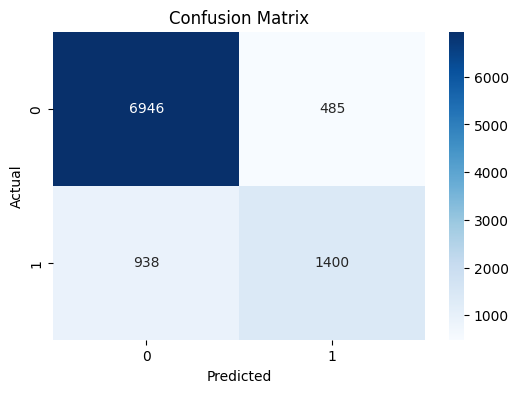

In [7]:

plot_confusion_matrix(y_test, y_pred)

ROC curves show the relationship between true and false positives. The model should ideally reach as close to the top left corner (many true positives, few false positives) as possible, and the model does a decent job of this, with an area under the curve score of 0.91 indicated the model can differentiate between the income groups about 91% of the time.

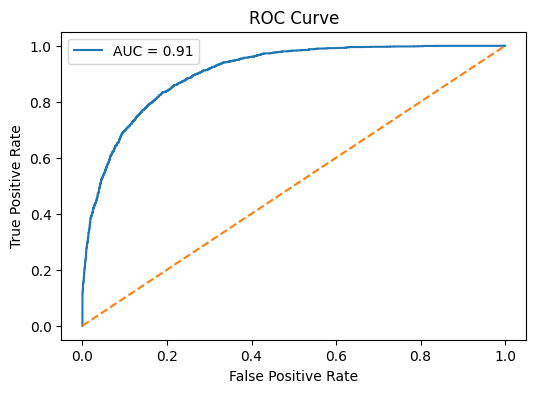

In [8]:
plot_roc_curve(y_test, y_prob)

The final graph shows the varaibles (and their specific outcomes) that had the largest impact on this logistic regression model. As we can see, the values that increase a person's chance of a higher income are capital gain, being married, being from France, and working an executive or managerial job. 

/Users/ruchitiwari/Desktop/Final CMOR 438/CMOR_438_Final_Repository/src/rice_ml/supervised_learning/logistic_regression.py:132: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


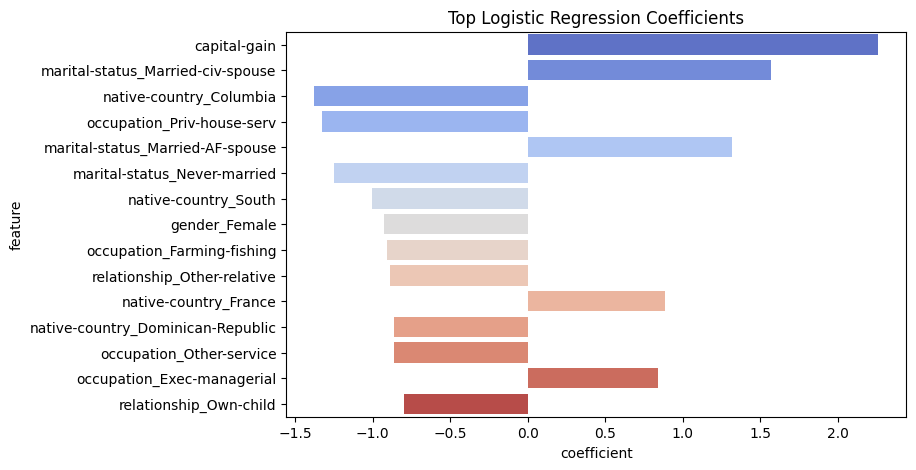

In [9]:
plot_top_coefficients(model, preprocessor)